In [1]:
import os
os.chdir("/home/sagemaker-user/data-bbog-integration-fabrica-personas/src")
import data_bbog_integration_fabrica_personas.pipelines.raw.nodes as raw
import data_bbog_integration_fabrica_personas.pipelines.primary.nodes as primary
import data_bbog_integration_fabrica_personas.pipelines.feature.nodes as feature
import data_bbog_integration_fabrica_personas.pipelines.model_input.nodes as mi
import data_bbog_integration_fabrica_personas.pipelines.models.nodes as models
import data_bbog_integration_fabrica_personas.pipelines.model_output.nodes as mo

In [2]:
import logging
import pandas as pd
import numpy as np

In [3]:
%load_ext kedro.ipython

[03/17/25 13:26:46] INFO     Resolved project path as:                                              ]8;id=186514;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=729850;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#139\139]8;;\
                             /home/sagemaker-user/data-bbog-integration-fabrica-personas.                          
                             To set a different path, run '%reload_kedro <project_root>'                           

[03/17/25 13:26:47] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=65960;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=323490;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=151565;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=896275;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/kedro/io/data_catalog.py:301: KedroDeprecationWarning:                        
                             Defining the 'layer' attribute at the top level is deprecated and will                
                             be removed in Kedro 0.19.0. Please move 'layer' inside the 'metadata'                 
                             -> 'kedro-viz' attributes. See                                                        
                             https://docs.kedro.org/en/latest/visualisation/kedro-viz_visualisation                
                             .html#visualise-layers for more information.                                          
                               warnings.warn(                                                                      
                                                                                                                   

[03/17/25 13:26:48] INFO     Kedro project data-bbog-integration-fabrica-personas                   ]8;id=910073;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=548284;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#108\108]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=487553;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=169193;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/ipython/__init__.py#109\109]8;;\
                             'pipelines'                                                                           

In [4]:
params1= catalog.list
params = catalog.load("parameters")
#params

                    INFO     Loading data from 'parameters' (MemoryDataset)...                  ]8;id=831031;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=839234;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [5]:
import logging
logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [6]:
group = 9

In [7]:
    X_train = catalog.load("X_train_scaler_master")
    y_train = catalog.load("Y_train_feature")
    XX = X_train
    yy = y_train

[11/25/24 19:27:49] INFO     Loading data from 'X_train_scaler_master' (ParquetDataSet)...      ]8;id=916046;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=136367;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[11/25/24 19:28:03] INFO     Loading data from 'Y_train_feature' (ParquetDataSet)...            ]8;id=861756;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=558688;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [8]:
    logger.info("Iniciando el balanceo de la variable objetivo...")
    logger.info(f"Muestreo de Balanceo: {group}")
    # target = [params["target"]]
    target = [params["target"]] if isinstance(params["target"], str) else params["target"]

[11/25/24 19:28:04] INFO     Iniciando el balanceo de la variable objetivo...                       ]8;id=992130;file:///tmp/ipykernel_4338/3966574133.py\3966574133.py]8;;\:]8;id=252643;file:///tmp/ipykernel_4338/3966574133.py#1\1]8;;\

                    INFO     Muestreo de Balanceo: 9                                                ]8;id=412414;file:///tmp/ipykernel_4338/3966574133.py\3966574133.py]8;;\:]8;id=657653;file:///tmp/ipykernel_4338/3966574133.py#2\2]8;;\

In [9]:
    target = [params["target"]]
    ids = [params["id"]]
    random_state = params['balance_target_variable']['random_state']

    sampling_strategy = params['balance_target_variable']["Muestreo"][group]['sampling_strategy_osc']
    sampling_strategy2 = params['balance_target_variable']["Muestreo"][group]['sampling_strategy_osc2']
    last_balance = params["balance_target_variable"]["Muestreo"][group]["Use_auto"]
    Type = params["balance_target_variable"]["Muestreo"][group]["Type"]
    df = pd.concat([XX,yy], axis = 1)
    try:
        y = df[target]
        X = df.drop(columns=target+ids, axis = 1)
    except:
        y = df[target]
        X = df.copy()
        for col in target +ids:
            try:
                X.drop(col, axis = 1, inplace = True)
            except:
                pass
    counts_before = yy.value_counts().to_frame()
    counts_before["%"] = counts_before.values/yy.shape[0]
    logger.info(f"Conteo de clases antes del balanceo: {counts_before}")


[11/25/24 19:28:07] INFO     Conteo de clases antes del balanceo:                        count     ]8;id=209760;file:///tmp/ipykernel_4338/1969993943.py\1969993943.py]8;;\:]8;id=826166;file:///tmp/ipykernel_4338/1969993943.py#23\23]8;;\
                             %                                                                                     
                             ah_target_ap_group3                                                                   
                             0                    3958785  0.627586                                                
                             1                    2349172  0.372414                                                

In [10]:
from imblearn.under_sampling import EditedNearestNeighbours

    import time
    ini = time.time()
    if Type == "ENN":
        if isinstance(last_balance, (int, float)):
            last_balance = int(last_balance)
        else:
            last_balance = int(np.sqrt(X.shape[0]))
        try:
            enn = EditedNearestNeighbours(sampling_strategy = sampling_strategy,
                                      n_neighbors = last_balance,
                                      kind_sel = sampling_strategy2,
                                     n_jobs = -1)
            X_resampled, y_resampled = enn.fit_resample(X, y)
        except:
            enn = EditedNearestNeighbours(sampling_strategy = 'auto',# submuestreo (Clase minorista = Clase mayorista)
                                      n_neighbors = last_balance,
                                      kind_sel = sampling_strategy2,
                                     n_jobs = -1)
            X_resampled, y_resampled = enn.fit_resample(X, y)
        df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        df_resampled[target] = y_resampled
        counts_after = y_resampled.value_counts().to_frame()
        counts_after["%"] = counts_after.values/counts_after.values.sum()
        logger.info(f"Conteo de clases después del balanceo Smote: {sampling_strategy}")
        logger.info(f"{counts_after}")
        fin = time.time()

fin - ini 

In [11]:
def convergence(data,window_size):
    suave = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    # El último valor de `suave` podría ser tu punto de convergencia
    punto_convergencia = suave[-1]
    return punto_convergencia

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import time
def metodo_silueta_codo(X,k_values):
    # Calcular el coeficiente de silueta para diferentes valores de k
    silhouette_scores = []
    code_scores = []
    models_k = []
    for k in k_values:
        ini = time.time()
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(X)
        code_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        models_k.append(k)
        fin = time.time()
        print(k,fin-ini)
    
    # Graficar el método de silueta
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de Silueta')
    plt.show()
    # Graficar el método del codo
    plt.plot(k_values, code_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Suma de Errores Cuadráticos (SSE)')
    plt.title('Método del Codo')
    plt.show()
    return silhouette_scores,code_scores,models_k

%%time
silhouette_scores,code_scores,models_k = metodo_silueta_codo(X,list(range(2,15,2)))

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import time
def metodo_silueta_codo(X,k_values):
    n = X.shape[1]
    for i in range(2):
        print("Varianza acumulada:",n)
        pca = PCA(n_components=n)
        X_reduced = pca.fit_transform(X)
        # Obtener la varianza explicada acumulada
        varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
        varianza_acumulada = np.array(varianza_acumulada)
        n = len(varianza_acumulada[varianza_acumulada<0.9])
        # Mostrar la varianza acumulada
        print(varianza_acumulada)
    # Calcular el coeficiente de silueta para diferentes valores de k
    silhouette_scores = []
    code_scores = []
    models_k = []
    for k in k_values:
        ini = time.time()
        kmeans = MiniBatchKMeans(n_clusters=k, batch_size = int(X_reduced.shape[0]*(1/8))) # 2 veces mas rapido
        cluster_labels = kmeans.fit_predict(X_reduced)
        code_scores.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X_reduced, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        models_k.append(k)
        fin = time.time()
        print(k,fin-ini)
    
    # Graficar el método de silueta
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de Silueta')
    plt.show()
    # Graficar el método del codo
    plt.plot(k_values, code_scores, marker='o')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Suma de Errores Cuadráticos (SSE)')
    plt.title('Método del Codo')
    plt.show()
    return silhouette_scores,code_scores,models_k,X_reduced

In [14]:
2

2

In [ ]:
%%time
silhouette_scores,code_scores,models_k,X_reduced = metodo_silueta_codo(X,list(range(2,15,2)))

Varianza acumulada: 25
[0.27920517 0.37339448 0.45192945 0.52835362 0.60304111 0.66476564
 0.70976599 0.75313362 0.79266911 0.83214678 0.87065203 0.9074857
 0.93204571 0.95047626 0.96735479 0.97854258 0.98625207 0.99052638
 0.99426787 0.99671742 0.99822197 0.99932357 0.99992323 1.
 1.        ]
Varianza acumulada: 11
[0.27920517 0.37339448 0.45192945 0.52835362 0.60304111 0.66476564
 0.70976599 0.75313362 0.79266911 0.83214678 0.87065203]


In [ ]:
sug = convergence(code_scores,3)
sug1 = silhouette_scores.index(np.max(silhouette_scores))
print(sug,sug1)

In [ ]:
select = max(sug,sug1)
print(select)
models_k[select).predict(X_reduced)

In [ ]:
# Definir el tamaño del nuevo conjunto de datos
new_size = 200

# Realizar el submuestreo estratificado
X_resampled, _, y_resampled, _ = train_test_split(X, y, train_size=new_size, stratify=y, random_state=42)

import pickle
import boto3
from io import BytesIO

# Configuración de S3
s3_client = boto3.client('s3')
bucket_name = 'data-bbog-dev-sandbox-entity'
#file_key = 'casos-uso/fabrica-personas/06-models/tdc/masivo/best_model_grid_search_MLP.pickle'
file_key = 'casos-uso/fabrica-personas/06-models/tdc/masivo/info_save_all.pickle'

# Descargar el archivo pickle desde S3
response = s3_client.get_object(Bucket=bucket_name, Key=file_key)
pickle_file = BytesIO(response['Body'].read())

# Cargar el objeto pickle
f = pickle.load(pickle_file)

print('Objeto cargado con éxito')
f ##3 modelo actual en s3

info_save_all2 # modelo con el que voy a sustituir el anterior

# Guardar el objeto modificado en un BytesIO para subirlo a S3
with BytesIO() as updated_pickle_file:
    #pickle.dump(grid_search, updated_pickle_file)
    pickle.dump(info_save_all2, updated_pickle_file)

    updated_pickle_file.seek(0)  # Volver al inicio del archivo en memoria

    # Subir el archivo actualizado a S3
    s3_client.put_object(Bucket=bucket_name, Key=file_key, Body=updated_pickle_file.read())

print('Objeto actualizado y guardado en S3 con éxito')


In [11]:
temporal_exp = True

In [12]:
# TdC
###X_train = catalog.load("X_train_scaler_master_sin_tc")
###y_train = catalog.load("Y_train_feature_sin_tc")
# CS
if temporal_exp == True:
    X_train = catalog.load("X_train_scaler_master")
    y_train = catalog.load("Y_train_feature")

[11/25/24 19:28:21] INFO     Loading data from 'X_train_scaler_master' (ParquetDataSet)...      ]8;id=731800;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=762783;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[11/25/24 19:28:31] INFO     Loading data from 'Y_train_feature' (ParquetDataSet)...            ]8;id=156758;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=859969;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [13]:
# TdC
###X_test = catalog.load("X_test_feature_sin_tc")
###y_test = catalog.load("Y_test_feature_sin_tc")
###scaler = catalog.load("scaler_transform_sin_tc")
# CS
if temporal_exp == True:
    X_test = catalog.load("X_train_scaler_master")
    y_test = catalog.load("Y_test_feature")
    scaler = catalog.load("scaler_transform")


[11/25/24 19:28:32] INFO     Loading data from 'X_train_scaler_master' (ParquetDataSet)...      ]8;id=179380;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=443950;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

[11/25/24 19:28:40] INFO     Loading data from 'Y_test_feature' (ParquetDataSet)...             ]8;id=287747;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=902688;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'scaler_transform' (PickleDataSet)...            ]8;id=695862;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=455074;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [8]:
## nodo 1: Balanceos

In [14]:
X_train

,ah_sum_saldo_promedio_mean_6,num_activos_prev,viv_sum_saldo_corte,vlr_ing_bru_mes,ah_sum_monto_trx_debito_std_6,sum_saldo_pasivos,AAAA,ah_sum_monto_trx_credito_mean_6,ah_sum_monto_trx_credito,ah_sum_saldo_promedio_mean_3,...,region_Region_Caribe,region_Region_Orinoquia,region_Region_Pacifica,mar_status_d,mar_status_l,mar_status_o,mar_status_p,mar_status_s,mar_status_u,mar_status_v
17999546,-0.146509,-0.676040,-0.237721,-0.006628,-0.240958,-0.180946,-0.411350,-0.804067,-0.263502,-0.145855,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
14257326,-0.101563,1.430047,-0.237721,-0.034648,-0.169929,0.004477,-0.411350,1.154177,0.274860,-0.099356,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
15096156,-0.146509,-0.676040,-0.237721,-0.000166,-0.240958,0.608401,-0.411350,-0.804067,-0.263502,-0.145856,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
4958052,-0.139209,-0.676040,-0.237721,-0.029244,-0.240958,-0.004069,-0.411350,-0.804067,-0.263502,-0.138650,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
17563879,-0.146509,-0.676040,4.157144,-0.006628,-0.238678,2.746152,-0.411350,-0.804067,-0.263502,-0.145856,...,-0.438315,-0.187631,2.404336,-0.036703,-0.000975,-0.056799,-0.118313,-1.779887,3.182003,-0.085856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994745,-0.035020,1.430047,-0.237721,-0.060059,0.369500,0.098905,-0.411350,1.042755,-0.027349,-0.000386,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
17145450,-0.146509,-0.676040,-0.237721,0.041835,-0.240958,0.167624,-0.411350,-0.804067,-0.263502,-0.145856,...,2.281465,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,-1.779887,-0.314267,-0.085856
20762873,-0.146509,-0.676040,-0.237721,-0.038937,-0.240958,-0.364364,2.431021,-0.804067,-0.263502,-0.145856,...,-0.438315,-0.187631,-0.415915,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856
15995147,1.335221,-0.676040,-0.237721,0.014512,0.607242,-1.152898,-0.411350,1.606501,1.346884,1.139425,...,-0.438315,-0.187631,2.404336,-0.036703,-0.000975,-0.056799,-0.118313,0.561833,-0.314267,-0.085856


In [15]:
        X_i2,y_i2 = models.run_clean_x_tratamiento_y(X_train,y_train,  params)
        X_i3,y_i3 = scaler.transform(X_test)
        X_i3,y_i3 = models.run_clean_x_tratamiento_y(X_i3,y_test,  params)

[11/25/24 19:29:49] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=787090;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=296999;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#54\54]8;;\

[11/25/24 19:29:50] INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=270253;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=718863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#385\385]8;;\
                             tratando los outliers                                                                 

[11/25/24 19:29:52] INFO     Comenzando a llenar los datos nulos                                       ]8;id=545006;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=179343;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[11/25/24 19:29:53] INFO     Datos Nulos rellenados.                                                   ]8;id=132863;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=186577;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#422\422]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=936227;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=198603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#426\426]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=959919;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=712977;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#324\324]8;;\

[11/25/24 19:29:58] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=851612;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=481657;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#434\434]8;;\

[11/25/24 19:30:00] INFO     Faltan variables strings!!!  Variable: 'region'. Se ejecutara el codigo a ]8;id=683788;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=123758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#649\649]8;;\
                             la fuerza                                                                             

                    INFO     Faltan variables strings!!!  Variable: 'mar_status'. Se ejecutara el      ]8;id=437472;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=86710;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#649\649]8;;\
                             codigo a la fuerza                                                                    

                    INFO     ['region' 'mar_status']                                                   ]8;id=536951;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=134509;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#651\651]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 X_i2,y_i2 = models.run_clean_x_tratamiento_y(X_train,y_train,  params)                       │
│ ❱ 2 X_i3,y_i3 = scaler.transform(X_test)                                                         │
│   3 X_i3,y_i3 = models.run_clean_x_tratamiento_y(X_i3,y_test,  params)                           │
│   4                                                                                              │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/model_input/nodes.py:1183 in transform                                          │
│                                                                                                  │
│   1180 │   │                                                                                     │
│   1181 │   │   df_adj = feature_selec_pd(df2,self.filters,self.params)                           │
│   1182 │   │   df_adj1 = run_numeric_values(df_adj,self.order_col_numeric,self.imputer_model_nu  │
│ ❱ 1183 │   │   df_adj2 = run_categorical_values(df_adj1,self.model_imputer_model_categorical,se  │
│   1184 │   │   df_adj3 = One_Hot_encoding_func(df_adj2,self.reindex_OneHotEncoding,self.params)  │
│   1185 │   │   scaler_master = min_max_scaler_pd(df_adj3,self.params,self.model_imputer_scale,   │
│   1186 │   │   return scaler_master,y_interest                                                   │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/model_input/nodes.py:653 in run_categorical_values                              │
│                                                                                                  │
│    650 │   │   names_col_null = model_imputer_model_categorical.feature_names_in_                │
│    651 │   │   logger.info(names_col_null)                                                       │
│    652 │   │   if process == "Simple":                                                           │
│ ❱  653 │   │   │   df2 = model_imputer_model_categorical.transform(df1[names_col_null])          │
│    654 │   │   │   df2 = pd.DataFrame(df2,columns = names_col_null, index = df1.index)           │
│    655 │   │   │   df2 = pd.concat([df2,df1[df1.columns[~df1.columns.isin(names_col_null)]]], a  │
│    656 │   │   │   df2 = df2[df1.columns]                                                        │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/pandas/core/frame. │
│ py:4096 in __getitem__                                                                           │
│                                                                                                  │
│    4093 │   │   else:                                                                            │
│    4094 │   │   │   if is_iterator(key):                                                         │
│    4095 │   │   │   │   key = list(key)                                                          │
│ ❱  4096 │   │   │   indexer = self.columns._get_indexer_strict(key, "columns")[1]                │
│    4097 │   │                                                                                    │
│    4098 │   │   # take() does not accept boolean indexers                                        │
│    4099 │   │   if getattr(indexer, "dtype", None) == bool:

In [17]:
X_test.shape
#X_train.shape

(6307957, 49)

In [9]:
%%time
if temporal_exp == True:
    info_save = models.Experimentacion_balanceos( X_train.iloc[:1000],y_train.iloc[:1000],X_test,y_test,scaler, params)

[11/25/24 17:58:02] INFO     Iniciando la filtracion de feature relevantes ...                          ]8;id=909131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=884329;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#54\54]8;;\

                    INFO     Iniciando con el tratamiento de datos nulos en variables numericas y      ]8;id=684597;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=373035;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#385\385]8;;\
                             tratando los outliers                                                                 

[11/25/24 17:58:04] INFO     Comenzando a llenar los datos nulos                                       ]8;id=408176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=865620;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#410\410]8;;\

[11/25/24 17:58:06] INFO     Datos Nulos rellenados.                                                   ]8;id=824660;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=459654;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#422\422]8;;\

                    INFO     Comenzando a transformar las variables con outliers                       ]8;id=503176;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=925698;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#426\426]8;;\

                    INFO     Comenzado a transformar los datos                                         ]8;id=912693;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=31665;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#324\324]8;;\

[11/25/24 17:58:11] INFO     Actualizando los datos nulos y outliers en variables numericas            ]8;id=168879;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=32777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#434\434]8;;\

[11/25/24 17:58:12] INFO     Faltan variables strings!!!  Variable: 'region'. Se ejecutara el codigo a ]8;id=157479;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=937669;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#649\649]8;;\
                             la fuerza                                                                             

                    INFO     Faltan variables strings!!!  Variable: 'mar_status'. Se ejecutara el      ]8;id=484911;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=241169;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#649\649]8;;\
                             codigo a la fuerza                                                                    

                    INFO     ['region' 'mar_status']                                                   ]8;id=656263;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py\nodes.py]8;;\:]8;id=928146;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/model_input/nodes.py#651\651]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/IPython/core/magic │
│ s/execution.py:1340 in time                                                                      │
│                                                                                                  │
│   1337 │   │   else:                                                                             │
│   1338 │   │   │   st = clock2()                                                                 │
│   1339 │   │   │   try:                                                                          │
│ ❱ 1340 │   │   │   │   exec(code, glob, local_ns)                                                │
│   1341 │   │   │   │   out=None                                                                  │
│   1342 │   │   │   │   # multi-line %%time case                                                  │
│   1343 │   │   │   │   if expr_val is not None:                                                  │
│ in <module>:2                                                                                    │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/models/nodes.py:344 in Experimentacion_balanceos                                │
│                                                                                                  │
│    341 │   │                                                                                     │
│    342 │   │   ## 0.0 Funcion Auxiliar para tratar la Y de interes y limpiar los X               │
│    343 │   │   X_i2,y_i2 = run_clean_x_tratamiento_y(X_train,y_train,  params)                   │
│ ❱  344 │   │   X_i3,y_i3 = scaler.transform(X_test)                                              │
│    345 │   │   X_i3,y_i3 = run_clean_x_tratamiento_y(X_i3,y_test,  params)                       │
│    346 │   │                                                                                     │
│    347 │   │   for i in range(int(n_ciclos)):                                                    │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/model_input/nodes.py:1183 in transform                                          │
│                                                                                                  │
│   1180 │   │                                                                                     │
│   1181 │   │   df_adj = feature_selec_pd(df2,self.filters,self.params)                           │
│   1182 │   │   df_adj1 = run_numeric_values(df_adj,self.order_col_numeric,self.imputer_model_nu  │
│ ❱ 1183 │   │   df_adj2 = run_categorical_values(df_adj1,self.model_imputer_model_categorical,se  │
│   1184 │   │   df_adj3 = One_Hot_encoding_func(df_adj2,self.reindex_OneHotEncoding,self.params)  │
│   1185 │   │   scaler_master = min_max_scaler_pd(df_adj3,self.params,self.model_imputer_scale,   │
│   1186 │   │   return scaler_master,y_interest                                                   │
│                                                                                                  │
│ /home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_pe │
│ rsonas/pipelines/model_input/nodes.py:653 in run_categorical_values                              │
│                                                                                                  │
│    650 │   │   names_col_null = model_imputer_model_categorical.feature_names_in_                │
│    651 │   │   logger.info(names_col_null)                 

In [11]:
if temporal_exp == True:
    print(info_save["nodo_run"])

0

In [12]:
%%time
if temporal_exp == True:
    grid_search, best_model, info_save = models.train_xgboost_with_cv(info_save,params)

                    INFO     INICIANDO ENTRENAMIENTO DE XGBOOTS ...                                    ]8;id=19198;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=21996;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#344\344]8;;\

                    INFO     Ejecutando el modelo: 0. Nombre: xgboost_0. NameTag: Run1                 ]8;id=903631;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=921699;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#350\350]8;;\

                    INFO     W: 1                                                                      ]8;id=518984;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=313937;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#367\367]8;;\

                    INFO     {'n_splits': 5, 'scoring': 'f1', 'n_jobs': -1}                            ]8;id=651460;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=741008;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#371\371]8;;\

                    INFO     {'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.3],              ]8;id=591269;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=528876;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#372\372]8;;\
                             'scale_pos_weight': [1, 10, 100], 'n_estimators': [100, 300, 455]}                    

CPU times: user 1.92 s, sys: 1.25 s, total: 3.17 s
Wall time: 5.27 s


In [13]:
if temporal_exp == True:
    print(info_save["nodo_run"])

1

In [14]:
%%time
if temporal_exp == True:
    grid_search, best_model, info_save = models.train_xgboost_with_cv(info_save,params)

[09/10/24 21:42:09] INFO     INICIANDO ENTRENAMIENTO DE XGBOOTS ...                                    ]8;id=425214;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=502489;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#344\344]8;;\

                    INFO     Ejecutando el modelo: 1. Nombre: xgboost_1. NameTag: Run2                 ]8;id=950073;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=562959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#350\350]8;;\

                    INFO     W: 1                                                                      ]8;id=356481;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=705156;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#367\367]8;;\

                    INFO     {'n_splits': 5, 'scoring': 'f1', 'n_jobs': -1}                            ]8;id=78603;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=467959;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#371\371]8;;\

                    INFO     {'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.3],              ]8;id=719471;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=903159;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#372\372]8;;\
                             'scale_pos_weight': [1, 10, 100], 'n_estimators': [100, 300, 455]}                    

CPU times: user 3.21 s, sys: 50.3 ms, total: 3.26 s
Wall time: 3.93 s


In [15]:
if temporal_exp == True:
    print(info_save["nodo_run"])

2

In [16]:
%%time
if temporal_exp == True:
    random_search, best_model, info_save = models.train_random_forest_with_cv(info_save,params)

[09/10/24 21:42:13] INFO     INICIANDO ENTRENAMIENTO DE RANDOM FOREST ...                              ]8;id=25135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=55782;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#431\431]8;;\

                    INFO     Ejecutando el modelo: 2. Nombre: random_forest_2. NameTag: Run3           ]8;id=919801;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=412546;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#437\437]8;;\

                    INFO     W: 1                                                                      ]8;id=681820;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=636273;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#454\454]8;;\

                    INFO     {'n_splits': 5, 'scoring': 'f1', 'n_jobs': -1, 'n_iter': 5}               ]8;id=720152;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=46496;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#459\459]8;;\

                    INFO     {'n_estimators': [3, 5], 'class_weight': [{0.0: 1, 1.0: 1}, {0.0: 1, 1.0: ]8;id=408119;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=859941;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#460\460]8;;\
                             10}, {0.0: 1, 1.0: 100}], 'max_depth': [3, 5, 10], 'min_samples_split':               
                             [0.02, 0.05, 0.1], 'min_samples_leaf': [1, 2, 4], 'max_features':                     
                             ['sqrt']}                                                                             

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs

CPU times: user 153 ms, sys: 17.3 ms, total: 170 ms
Wall time: 330 ms


In [17]:
if temporal_exp == True:
    print(info_save["nodo_run"])

3

In [18]:
%%time
if temporal_exp == True:
    random_search, best_model, info_save = models.red_neuronal(info_save,params)

                    INFO     INICIANDO ENTRENAMIENTO DE MLP CLASSIFIER ...                             ]8;id=261256;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=256601;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#545\545]8;;\

                    INFO     Ejecutando el modelo: 3. Nombre: MLP_3. NameTag: Run4                     ]8;id=17591;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=243430;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#551\551]8;;\

'(1)' en 'hidden_layer_sizes' es un string.
'(100)' en 'hidden_layer_sizes' es un string.
'(10)' en 'hidden_layer_sizes' es un string.
'(20)' en 'hidden_layer_sizes' es un string.
'(10' en 'hidden_layer_sizes' es un string.
'5)' en 'hidden_layer_sizes' es un string.
'(20' en 'hidden_layer_sizes' es un string.
'10)' en 'hidden_layer_sizes' es un string.
'tanh' en 'activation' es un string.
'logistic' en 'activation' es un string.
'relu' en 'activation' es un string.
'adam' en 'solver' es un string.
'sgd' en 'solver' es un string.
0.0001 en 'alpha' es un número.
0.001 en 'alpha' es un número.
0.01 en 'alpha' es un número.
1.0 en 'alpha' es un número.
-------
Advertencia: El valor (1) en 'hidden_layer_sizes' no es un entero ni una tupla.
Advertencia: El valor (100) en 'hidden_layer_sizes' no es un entero ni una tupla.
Advertencia: El valor (10) en 'hidden_layer_sizes' no es un entero ni una tupla.
Advertencia: El valor (20) en 'hidden_layer_sizes' no es un entero ni una tupla.
Advertencia

                    INFO     W: 1                                                                      ]8;id=872114;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=248454;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#583\583]8;;\

                    INFO     {'n_splits': 5, 'scoring': 'f1', 'n_jobs': -1}                            ]8;id=716313;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=252739;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#586\586]8;;\

                    INFO     {'hidden_layer_sizes': [], 'activation': ['tanh', 'logistic', 'relu'],    ]8;id=852510;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=737884;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#587\587]8;;\
                             'solver': ['adam', 'sgd'], 'alpha': [0.0001, 0.01, 0.001, 1.0]}                       

                    INFO     Codigo Fallo. Nueva grilla:                                               ]8;id=211986;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=164728;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#607\607]8;;\

                    INFO     {'hidden_layer_sizes': [1, 100, 10, 20, (10, 5), (20, 10)], 'activation': ]8;id=914608;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=875195;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#608\608]8;;\
                             ['tanh', 'logistic', 'relu'], 'solver': ['adam', 'sgd'], 'alpha':                     
                             [0.0001, 0.01, 0.001, 1]}                                                             

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) 

[09/10/24 21:42:20] WARNING  /home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-p ]8;id=734941;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py\warnings.py]8;;\:]8;id=59714;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/warnings.py#109\109]8;;\
                             ackages/sklearn/neural_network/_multilayer_perceptron.py:691:                         
                             ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250)                    
                             reached and the optimization hasn't converged yet.                                    
                               warnings.warn(                                                                      
                                                                                                                   

In [19]:
if temporal_exp == True:
    print(info_save["nodo_run"])

4

In [6]:
temporal_exp = False
params['plot']['desea_plot'] = False

In [7]:
%%time
if temporal_exp == True:
    pass
else:
    temp_info = catalog.load("info_save1")

[09/17/24 00:17:39] INFO     Loading data from 'info_save1' (PickleDataSet)...                  ]8;id=777298;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=631250;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

CPU times: user 7.24 s, sys: 4.46 s, total: 11.7 s
Wall time: 46.4 s


In [8]:
%%time
if temporal_exp == True:
    info_save = models.evaluate_models_for_all(info_save,params)
else:
    temp_info = models.evaluate_models_for_all(temp_info,params)

[09/17/24 00:18:25] INFO     Iniciando la evaluacion de modelos...                                     ]8;id=86758;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=926948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#790\790]8;;\

                    INFO     Iniciando la evaluacion de 'MLP_0' o 'Run1' ...                           ]8;id=849924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=309299;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'MLP_0' o 'Run1' en balance...                ]8;id=254978;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=882912;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:18:26] INFO     Evaluacion de metricas para 'MLP_0' o 'Run1' en train...                  ]8;id=736522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=886791;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:19:39] INFO     Evaluacion de metricas para 'MLP_0' o 'Run1' en test...                   ]8;id=240142;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=876972;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:19:52] INFO     Iniciando la evaluacion de 'MLP_1' o 'Run2' ...                           ]8;id=148916;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=620907;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'MLP_1' o 'Run2' en balance...                ]8;id=251480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=671525;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

                    INFO     Evaluacion de metricas para 'MLP_1' o 'Run2' en train...                  ]8;id=573794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=179940;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:21:05] INFO     Evaluacion de metricas para 'MLP_1' o 'Run2' en test...                   ]8;id=176359;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=976136;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:21:17] INFO     Iniciando la evaluacion de 'xgboost_2' o 'Run3' ...                       ]8;id=78948;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=287464;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_2' o 'Run3' en balance...            ]8;id=196190;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=768975;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_2' o 'Run3' en train...              ]8;id=28777;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=720568;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:22:29] INFO     Evaluacion de metricas para 'xgboost_2' o 'Run3' en test...               ]8;id=961664;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=841595;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:22:41] INFO     Iniciando la evaluacion de 'xgboost_3' o 'Run4' ...                       ]8;id=167506;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=140480;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_3' o 'Run4' en balance...            ]8;id=879945;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=948291;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_3' o 'Run4' en train...              ]8;id=743867;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=910929;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:23:55] INFO     Evaluacion de metricas para 'xgboost_3' o 'Run4' en test...               ]8;id=118695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=883662;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:24:08] INFO     Iniciando la evaluacion de 'random_forest_4' o 'Run5' ...                 ]8;id=947806;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=127229;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'random_forest_4' o 'Run5' en balance...      ]8;id=159131;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=902689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.1s finished


                    INFO     Evaluacion de metricas para 'random_forest_4' o 'Run5' en train...        ]8;id=359596;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=757713;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    2.9s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    6.0s finished


[09/17/24 00:25:26] INFO     Evaluacion de metricas para 'random_forest_4' o 'Run5' en test...         ]8;id=8750;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=770522;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    1.3s finished


[09/17/24 00:25:40] INFO     Iniciando la evaluacion de 'MLP_5' o 'Run6' ...                           ]8;id=984720;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=333080;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'MLP_5' o 'Run6' en balance...                ]8;id=674858;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=300482;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

                    INFO     Evaluacion de metricas para 'MLP_5' o 'Run6' en train...                  ]8;id=465831;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=576574;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:26:52] INFO     Evaluacion de metricas para 'MLP_5' o 'Run6' en test...                   ]8;id=11105;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=171738;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:27:04] INFO     Iniciando la evaluacion de 'xgboost_6' o 'Run7' ...                       ]8;id=909578;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=392827;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_6' o 'Run7' en balance...            ]8;id=907422;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=845974;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:27:05] INFO     Evaluacion de metricas para 'xgboost_6' o 'Run7' en train...              ]8;id=98065;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=136707;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:28:18] INFO     Evaluacion de metricas para 'xgboost_6' o 'Run7' en test...               ]8;id=453113;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=303733;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:28:31] INFO     Iniciando la evaluacion de 'random_forest_7' o 'Run8' ...                 ]8;id=388391;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=293018;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'random_forest_7' o 'Run8' en balance...      ]8;id=176989;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=899634;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.0s finished


                    INFO     Evaluacion de metricas para 'random_forest_7' o 'Run8' en train...        ]8;id=871800;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=91260;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    2.5s finished


[09/17/24 00:29:07] INFO     Evaluacion de metricas para 'random_forest_7' o 'Run8' en test...         ]8;id=765167;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=387403;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 100 out of 100 | elapsed:    0.5s finished


[09/17/24 00:29:13] INFO     Iniciando la evaluacion de 'random_forest_8' o 'Run9' ...                 ]8;id=193144;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=415832;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'random_forest_8' o 'Run9' en balance...      ]8;id=110547;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=772685;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.1s finished


                    INFO     Evaluacion de metricas para 'random_forest_8' o 'Run9' en train...        ]8;id=329689;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=138965;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.3s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    6.6s finished


[09/17/24 00:30:33] INFO     Evaluacion de metricas para 'random_forest_8' o 'Run9' en test...         ]8;id=181393;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=973039;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    1.5s finished


[09/17/24 00:30:46] INFO     Iniciando la evaluacion de 'xgboost_9' o 'Run10' ...                      ]8;id=822569;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=716135;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'xgboost_9' o 'Run10' en balance...           ]8;id=481121;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=662408;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:30:47] INFO     Evaluacion de metricas para 'xgboost_9' o 'Run10' en train...             ]8;id=88695;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=138045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:32:06] INFO     Evaluacion de metricas para 'xgboost_9' o 'Run10' en test...              ]8;id=596450;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=164924;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:32:21] INFO     Iniciando la evaluacion de 'MLP_10' o 'Run11' ...                         ]8;id=472118;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=338331;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'MLP_10' o 'Run11' en balance...              ]8;id=922826;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=880653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:32:22] INFO     Evaluacion de metricas para 'MLP_10' o 'Run11' en train...                ]8;id=605435;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=232794;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:33:43] INFO     Evaluacion de metricas para 'MLP_10' o 'Run11' en test...                 ]8;id=858064;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=399023;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[09/17/24 00:33:57] INFO     Iniciando la evaluacion de 'random_forest_11' o 'Run12' ...               ]8;id=769895;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=81841;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#799\799]8;;\

                    INFO     Evaluacion de metricas para 'random_forest_11' o 'Run12' en balance...    ]8;id=672931;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=418045;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    0.1s finished


[09/17/24 00:33:58] INFO     Evaluacion de metricas para 'random_forest_11' o 'Run12' en train...      ]8;id=334500;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=307425;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    3.0s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    6.1s finished


[09/17/24 00:35:24] INFO     Evaluacion de metricas para 'random_forest_11' o 'Run12' en test...       ]8;id=277653;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=644775;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#805\805]8;;\

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=32)]: Done 300 out of 300 | elapsed:    1.5s finished


CPU times: user 31min 8s, sys: 1min 39s, total: 32min 47s
Wall time: 17min 13s


[09/17/24 00:35:39] INFO     Iniciando la comparacion de metricas sobre las datas generadas en         ]8;id=265899;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=238655;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#838\838]8;;\
                             Model_input:                                                                          

                    INFO     Graficos de desempeños en ['cohen_kappa', 'roc_auc'] calculadas tipo:     ]8;id=390606;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=52281;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#842\842]8;;\
                             ['overall metric']                                                                    

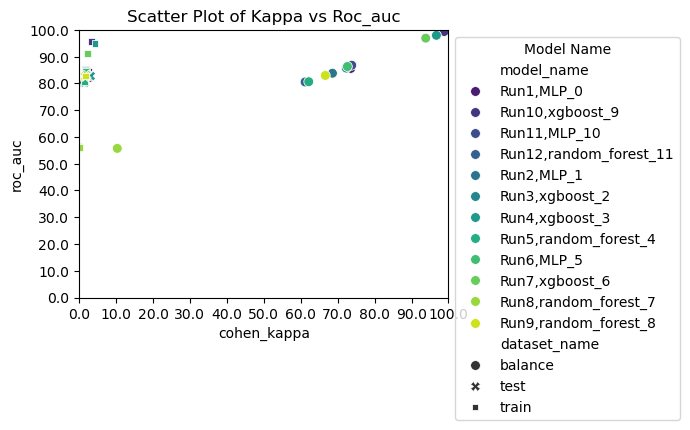

                    INFO     Graficos de desempeños en ['1', '1.0', 1, 1.0] calculadas sobre y         ]8;id=72724;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=667426;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#867\867]8;;\
                             f1-score                                                                              

                    INFO     Algoritmos con Metricas = 0: ['Run5,random_forest_4',                     ]8;id=460493;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=713799;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#874\874]8;;\
                             'Run8,random_forest_7', 'Run9,random_forest_8', 'Run11,MLP_10',                       
                             'Run12,random_forest_11']                                                             

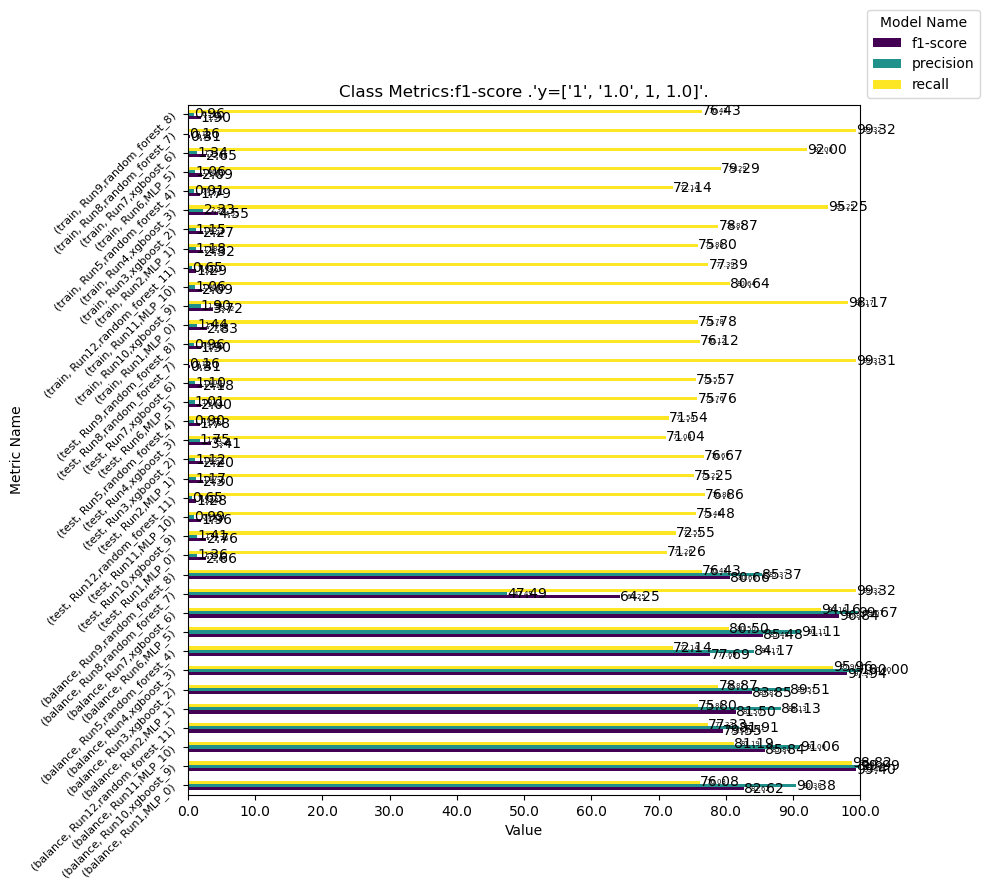

[09/17/24 00:35:40] INFO     Mejores algoritmos por metrica y dataset:                                 ]8;id=417836;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=919098;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#910\910]8;;\

,model_name,dataset_name,metric_name,metric_type,class_name,value
35,"Run4,xgboost_3",test,f1-score,class metric,1,3.4111
33,"Run4,xgboost_3",test,precision,class metric,1,1.7475
70,"Run8,random_forest_7",test,recall,class metric,1,99.3126
32,"Run4,xgboost_3",train,f1-score,class metric,1,4.5483
30,"Run4,xgboost_3",train,precision,class metric,1,2.3298
67,"Run8,random_forest_7",train,recall,class metric,1,99.3240


                    INFO     Mejores algoritmos:                                                       ]8;id=210208;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py\nodes.py]8;;\:]8;id=732400;file:///home/sagemaker-user/data-bbog-integration-fabrica-personas/src/data_bbog_integration_fabrica_personas/pipelines/models/nodes.py#957\957]8;;\

,best_model_name,best_unbiased_model,best_fitting_model
model_name,"Run4,xgboost_3","Run8,random_forest_7","Run8,random_forest_7"
metric_name,f1-score,f1-score,f1-score
metric_type,class metric,class metric,class metric
class_name,1,1,1
test,3.4111,0.3141,0.3141
balance,97.939,64.2529,64.2529
train,4.5483,0.3141,0.3141
bias,-93.3907,-63.9388,-63.9388
real_bias,True,True,True
test-train,-1.1372,0.0,0.0


In [9]:
if temporal_exp== True:
    info_save = models.compare_metrics_models(info_save, params)
else:
    temp_info = models.compare_metrics_models(temp_info,params)


In [10]:
temp_info['all_results'].head(10)

,model_name,dataset_name,metric_name,metric_type,class_name,value
0,"Run1,MLP_0",balance,accuracy,overall metric,overall metric,87.9963
1,"Run1,MLP_0",balance,precision,overall metric,overall metric,90.3838
2,"Run1,MLP_0",balance,recall,overall metric,overall metric,76.0849
3,"Run1,MLP_0",balance,f1-score,overall metric,overall metric,82.6203
4,"Run1,MLP_0",balance,True positives,overall metric,overall metric,8854.0000
5,"Run1,MLP_0",balance,False negatives,overall metric,overall metric,2783.0000
6,"Run1,MLP_0",balance,True negatives,overall metric,overall metric,18453.0000
7,"Run1,MLP_0",balance,False positives,overall metric,overall metric,942.0000
8,"Run1,MLP_0",balance,roc_auc,overall metric,overall metric,85.6140
9,"Run1,MLP_0",balance,cohen_kappa,overall metric,overall metric,73.5553


In [17]:
#info_save_all = catalog.load("info_save_all")

[09/17/24 00:08:32] INFO     Loading data from 'info_save_all' (PickleDataSet)...               ]8;id=315719;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=636542;file:///home/sagemaker-user/.conda/envs/proyecto_fabrica/lib/python3.9/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [18]:
all_results = info_save_all['all_results'].copy()
all_results.head(10)

,model_name,dataset_name,metric_name,metric_type,class_name,value
0,"Run1,MLP_0",balance,accuracy,overall metric,overall metric,0.879963
1,"Run1,MLP_0",balance,precision,overall metric,overall metric,0.903838
2,"Run1,MLP_0",balance,recall,overall metric,overall metric,0.760849
3,"Run1,MLP_0",balance,f1-score,overall metric,overall metric,0.826203
4,"Run1,MLP_0",balance,True positives,overall metric,overall metric,8854.000000
5,"Run1,MLP_0",balance,False negatives,overall metric,overall metric,2783.000000
6,"Run1,MLP_0",balance,True negatives,overall metric,overall metric,18453.000000
7,"Run1,MLP_0",balance,False positives,overall metric,overall metric,942.000000
8,"Run1,MLP_0",balance,roc_auc,overall metric,overall metric,0.856140
9,"Run1,MLP_0",balance,cohen_kappa,overall metric,overall metric,0.735553


In [83]:
all_results.head(60)

,model_name,dataset_name,metric_name,metric_type,class_name,value
0,"Run1,MLP_0",balance,accuracy,overall metric,overall metric,8.799626e-01
1,"Run1,MLP_0",balance,precision,overall metric,overall metric,9.038383e-01
2,"Run1,MLP_0",balance,recall,overall metric,overall metric,7.608490e-01
3,"Run1,MLP_0",balance,f1-score,overall metric,overall metric,8.262026e-01
4,"Run1,MLP_0",balance,True positives,overall metric,overall metric,8.854000e+03
5,"Run1,MLP_0",balance,False negatives,overall metric,overall metric,2.783000e+03
6,"Run1,MLP_0",balance,True negatives,overall metric,overall metric,1.845300e+04
7,"Run1,MLP_0",balance,False positives,overall metric,overall metric,9.420000e+02
8,"Run1,MLP_0",balance,roc_auc,overall metric,overall metric,8.561399e-01
9,"Run1,MLP_0",balance,cohen_kappa,overall metric,overall metric,7.355530e-01


In [84]:
# Valores de 'metric_name' que requieren transformación
metric_names_to_transform = {'accuracy', 'precision', 'recall', 'f1-score', 'roc_auc', 'cohen_kappa', 'matthews_corrcoef'}

# Aplicar la transformación
all_results.loc[all_results['metric_name'].isin(metric_names_to_transform), 'value'] = (
    all_results.loc[all_results['metric_name'].isin(metric_names_to_transform), 'value'].astype(float) * 100).round(4)

# Mostrar las primeras 60 filas del DataFrame
all_results['value'] = all_results['value'].apply(lambda x: f"{x:.4f}")
all_results.head(60)

,model_name,dataset_name,metric_name,metric_type,class_name,value
0,"Run1,MLP_0",balance,accuracy,overall metric,overall metric,87.9963
1,"Run1,MLP_0",balance,precision,overall metric,overall metric,90.3838
2,"Run1,MLP_0",balance,recall,overall metric,overall metric,76.0849
3,"Run1,MLP_0",balance,f1-score,overall metric,overall metric,82.6203
4,"Run1,MLP_0",balance,True positives,overall metric,overall metric,8854.0000
5,"Run1,MLP_0",balance,False negatives,overall metric,overall metric,2783.0000
6,"Run1,MLP_0",balance,True negatives,overall metric,overall metric,18453.0000
7,"Run1,MLP_0",balance,False positives,overall metric,overall metric,942.0000
8,"Run1,MLP_0",balance,roc_auc,overall metric,overall metric,85.6140
9,"Run1,MLP_0",balance,cohen_kappa,overall metric,overall metric,73.5553


In [21]:
desea_guardar = False

In [ ]:
# Especifica la ruta del archivo donde deseas guardar el modelo
ruta_guardar =  '/home/sagemaker-user/data-bbog-integration-fabrica-personas/data/experimentacion.pkl'

In [ ]:
# Guarda el modelo en un archivo pickle
import pickle
if desea_guardar == True:
    with open(ruta_guardar, 'wb') as archivo:
        pickle.dump(info_save, archivo)
    print(f'Modelo guardado en {ruta_guardar}')